<a href="https://colab.research.google.com/github/PKpacheco/project_1_ai/blob/main/project_1_ai_final_Paola_Pacheco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
Intro to AI
\
Instructor: Jeffrey Lanyon
\
Student: Paola Katherine Pacheco


Kaggle titanic - https://www.kaggle.com/pkatherine/pkpacheco-0374446

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from collections import Counter



## 1.a) Load the data from the given path into a pandas DataFrame

In [ ]:
# load the csv uploaded to github into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/PKpacheco/project_1_ai/main/student-por.csv", delimiter=';' )

In [ ]:
# print the header
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Column description :
* school - student's school (School Mary Ana --> MA)

* sex - student's sex

* age - student's age

* address - student's home address type ( 'U' - urban or 'R' - rural)

* famsize - family size

* Pstatus - parent's cohabitation status ('T' - living together or 'A' - apart)

* Medu - mother's education

* Fedu - father's education

* Mjob - mother's job

* Fjob - father's job

* reason - reason to choose this school

* guardian - student's guardian

* traveltime - home to school travel time

* studytime - weekly study time

* failures - number of past class failures

* schoolsup - extra educational support

* famsup - family educational support

* paid - extra paid classes within the course subject

* activities - extra-curricular activities

* nursery - attended nursery school

* higher - wants to take higher education

* internet - Internet access at home

* romantic - with a romantic relationship

* famrel - quality of family relationships

* freetime - free time after school

* goout - going out with friends

* Dalc - workday alcohol consumption

* Walc - weekend alcohol consumption

* health - current health status

* absences - number of school absences

## 1.b) How many rows are there in the dataset?
649 rows

In [ ]:
num_rows = df.shape[0]
print("Number of rows in the df:", num_rows)


Number of rows in the df: 649


In [ ]:
num_columns = df.shape[1]
print("Number of columns in the df:", num_columns)


Number of columns in the df: 33


## 2.a)Combine the grades G1, G2, and G3 into a column called total_mark.


In [ ]:
df['total_mark'] = df['G1'] + df['G2'] + df['G3']

In [ ]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_mark
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,31
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,46
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,32
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,30
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,4,10,11,11,32


## 2.b) Create a new binary column called pass. If the total mark is below 35 for G1, G2,and G3, it should be labeled as 0 (fail), else 1 (pass).


In [ ]:
# if total_mark> 35, 1, else, 0
df['pass'] = (df['total_mark']) >= 35
df['pass'] = df['pass'].astype(int)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,total_mark,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,22,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,31,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,37,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,42,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,37,1


## 2.c) Drop the columns G1, G2, G3, and total_mark.





In [ ]:
# drop columns
df.drop(columns=['G1', 'G2', 'G3', 'total_mark'], inplace=True)


## 2.d) How many columns are left after this operation?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Data columns (total 31 columns)


## 2.e) How many students are in the data set?

In [ ]:
# check for duplicate entries
df.duplicated().sum()

0

In [ ]:
# check for null value
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
pass          0
dtype: int64

In [ ]:
num_students = df.shape[0]

# Print the number of students
print("Number of students:", num_students)

Number of students: 649




649 students, there are no null or duplicate columns

## 2.f) How many students passed?


In [ ]:
# count how many students passed, have pass = 1
pass_count = (df['pass'] == 1).sum()
print("Number of students passed :", pass_count)

Number of students passed : 328


## 2.g) Discuss the data distribution.


`Age`: the minimul is 15 and maximum is 22. The aerage is 16 almost 17, so, most of the students are between 16 ans 18.

`Study time`: indicated that the average it's a little bit low, the maximum is 4 but most of the students are studying between 1 and 2 hours.

`Failure`: There are some students who failed 3 times, but most of them did not report that they failed, we can notice that in the pecentis there are many values zero and the mean it's super low.

`pass/fail`: approximately 51% of students pass and the rest fail


In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,pass
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,0.505393
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,0.500357
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,1.000000


<ipython-input-42-5a3de674a9b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


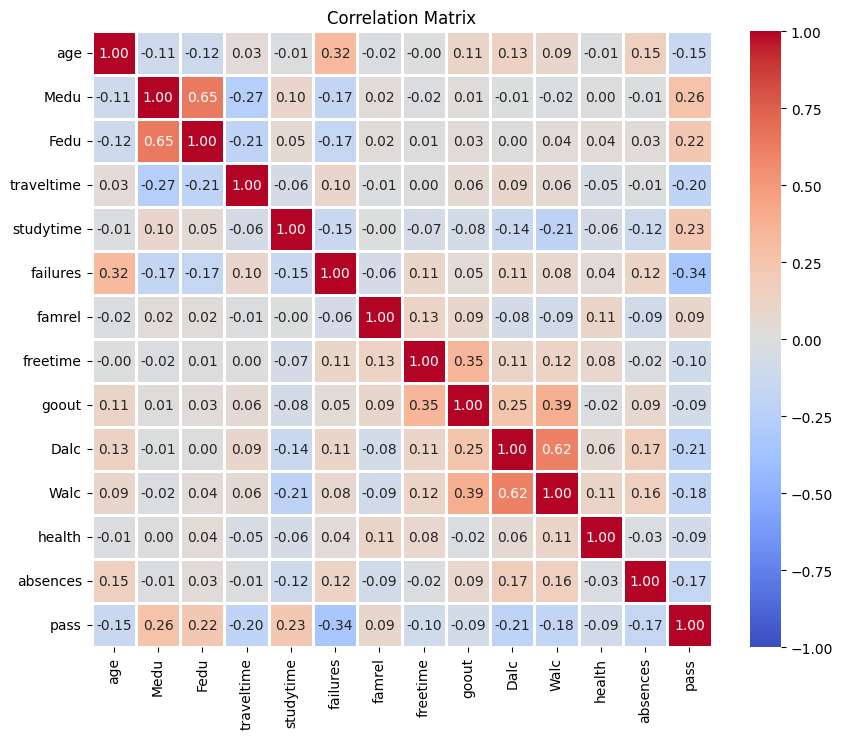

In [ ]:
# associate correlation dataframe to a variable
correlation_matrix = df.corr()

# generate the heatmap using seaborn
# positive correlations are red and negative are blue
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1, annot=True, fmt=".2f")

# create a title to correlation map
plt.title('Correlation Matrix')
# display the heatmap
plt.show()

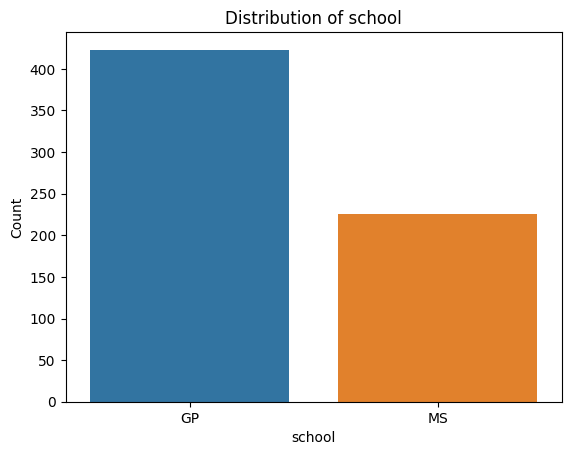

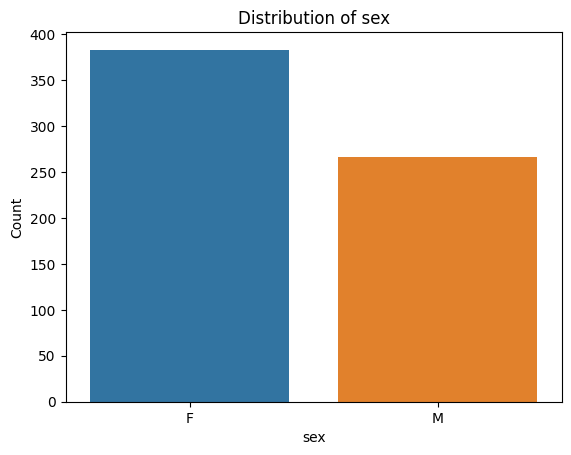

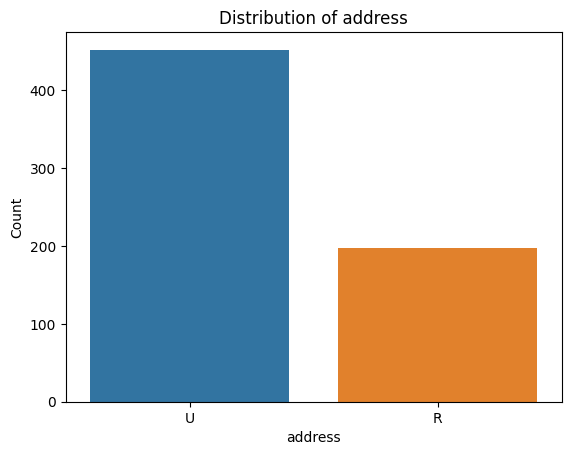

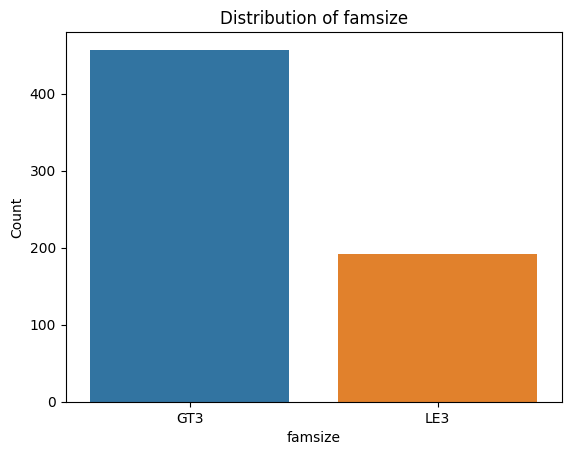

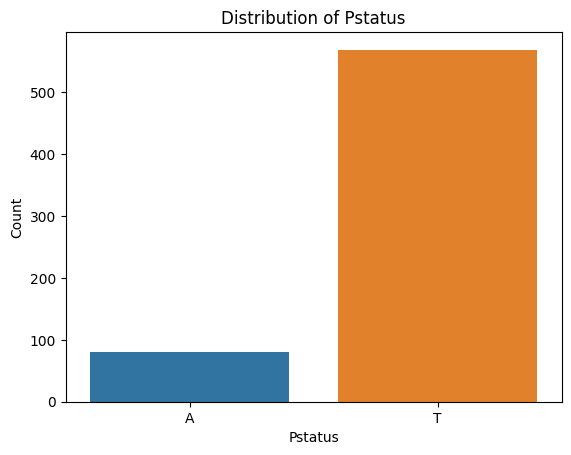

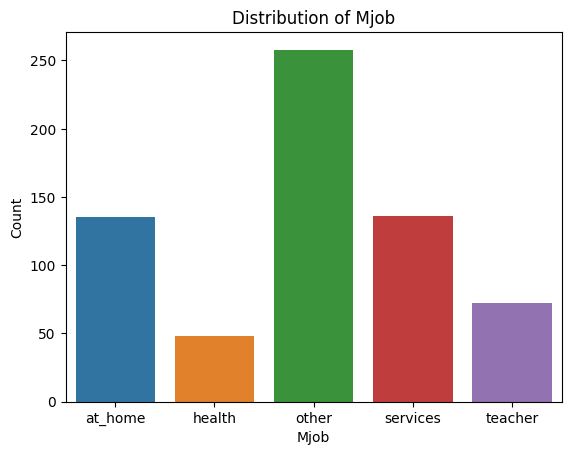

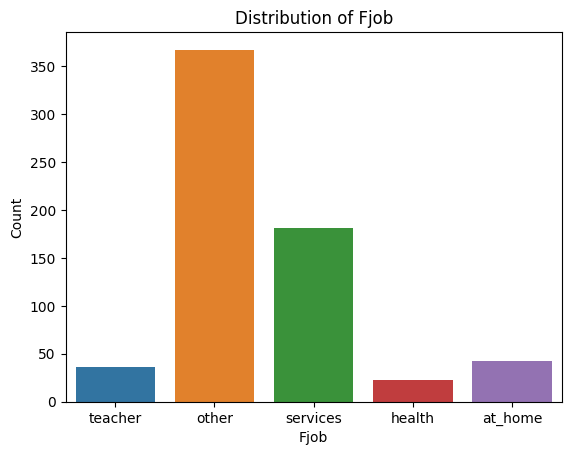

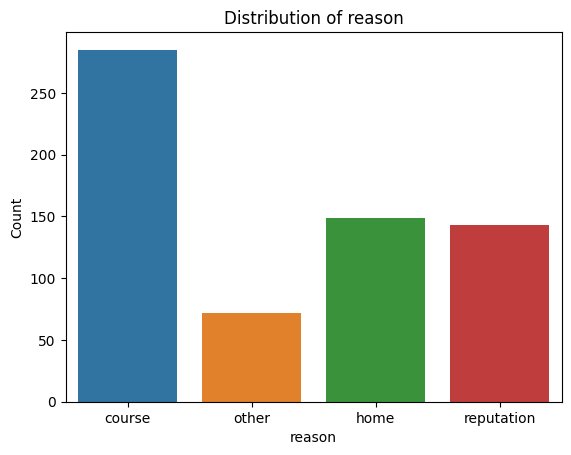

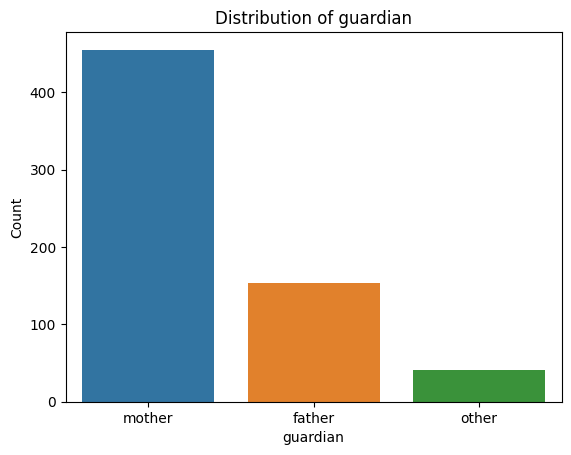

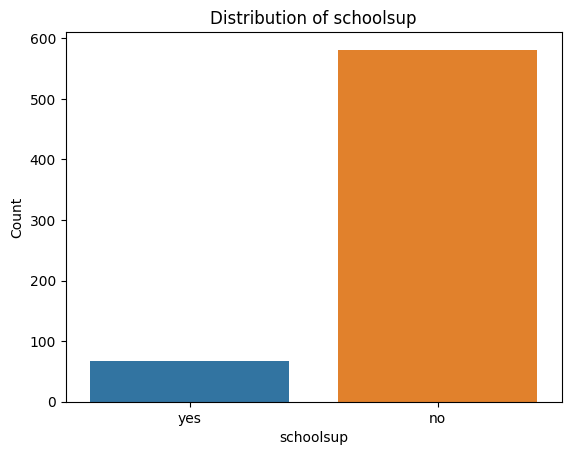

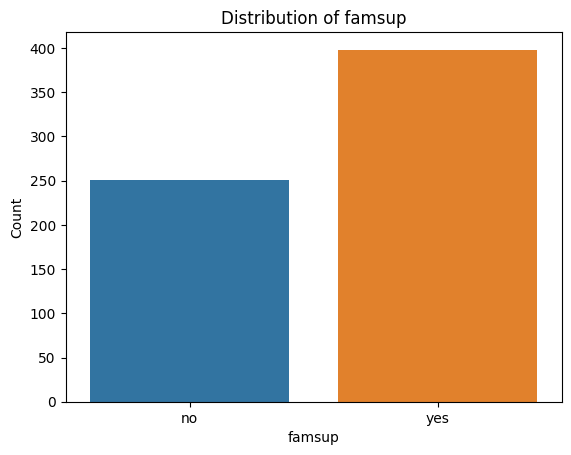

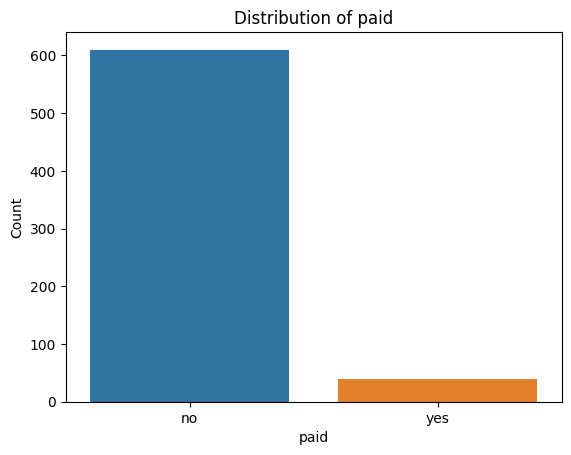

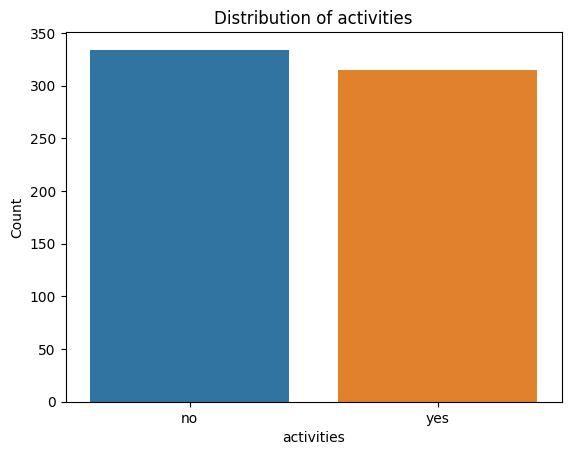

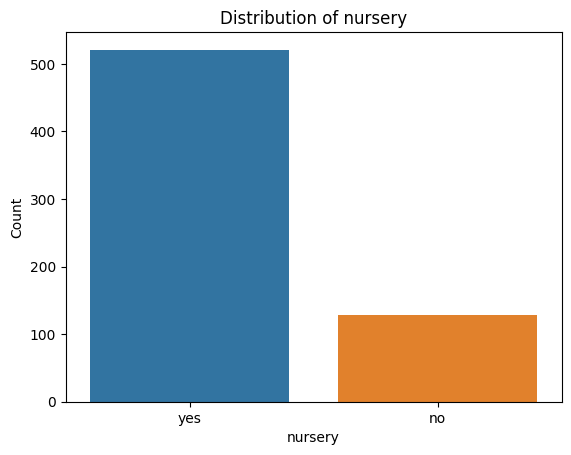

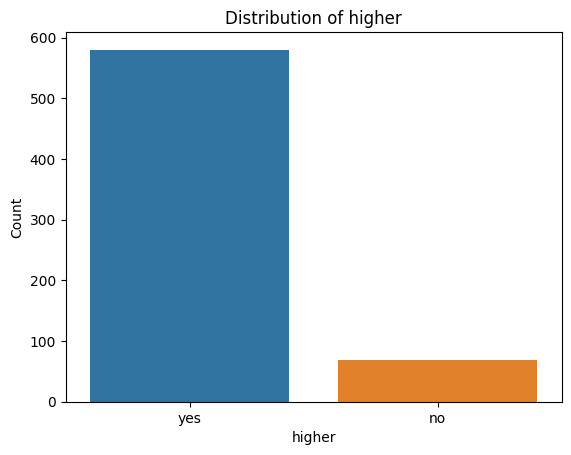

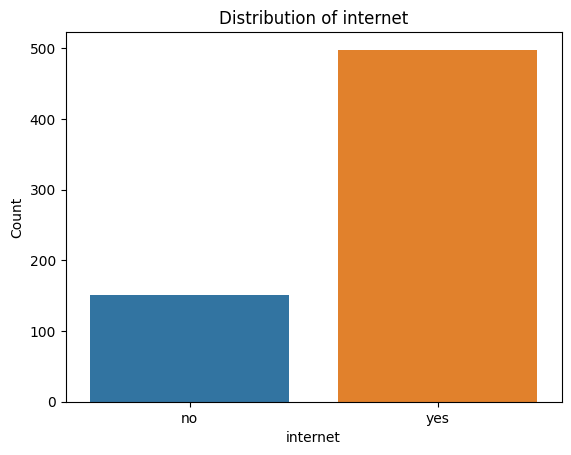

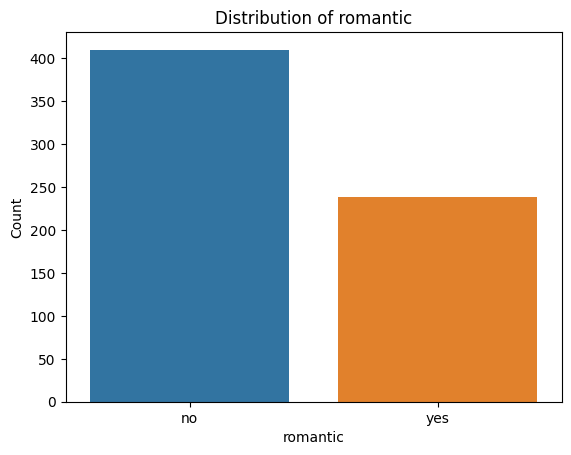

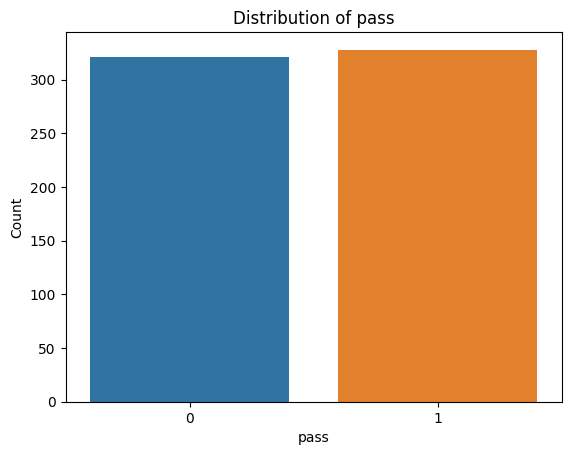

In [ ]:
# plot the distribution for each column
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'pass']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Comments:

* there are more women than men
* more students are under the custody of their mother instead of their father
* In terms of activities, it is very similar, between students who do or do not do extra activities.
* Most students have internet


Also we noticed Positive correlation on these features:


*   Age and dalc (alcohol consume)

We can assume tht older the person is, more high is the alchohol consume.

*   Fedu(father education)and medu(mother education)

We can assume parents are walking together and have similar education level.

*   Fails - age

We can assume, older students may fail more, for different reasons.

*   Dalc(alcohol consume)  and walc( weekend alcohol consume)  

We can assume people usually drink more during the weekend.


*   Goout-freetime

We can assume that during the most freetime period the students usually go out.



## 3.a) Create a list called mylist for the categorical data.


In [ ]:
# create a list fot categorical data ( represent categories or groups)
mylist = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
print(mylist)


['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,0


## 3.b) Convert the categorical columns provided in the mylist variable into one-hot encoded columns. This will be useful when we build the decision tree.


In [ ]:
# init onehotenconder
encoder = OneHotEncoder(sparse=False, drop='first')

# fit mylist
df_encoded = encoder.fit_transform(df[mylist])

# create a df with one-hot encoded columns
encoded_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(mylist))


# add the enconded column to a old df
df = pd.concat([df, encoded_df], axis=1)

# drop. my list
df.drop(columns=mylist, inplace=True)

print(df)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         0       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
644   19     2     3           1          3         1       5         4   
645   18     3     1           1          2         0       4         3   
646   18     1     1           2          2         0       1         1   
647   17     3     1           2          1         0       2         4   
648   18     3     2           3          1         0       4         4   

     goout  Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  \
0        4     1  ...     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,0,4,3,2,2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


## 4.a) Shuffle the dataset and split it into training and test sets. Use the first 500 rows for training and the rest for testing.


In [ ]:
# Calculate the percentage, for 500 lines test
percentage = (500 / 649) * 100

print(percentage)


77.04160246533128


In [ ]:
# use the difference to calculate the test size
train_df, test_df = train_test_split(df, test_size=0.23, random_state=42)

# Display the shapes of the training and test sets
print("Training set:", len(train_df))
print("Test set:", len(test_df))

Training set: 499
Test set: 150


## 4.b) Separate the features and target variable (pass) for the training and test sets.

In [ ]:
# remove pass from training set
X_train = train_df.drop(columns=['pass'])
# set the target variable (pass) for training set
y_train = train_df['pass']

# remove pass from test set
X_test = test_df.drop(columns=['pass'])
# set the target variable (pass) for test set
y_test = test_df['pass']


In [ ]:
# convert the columns to string to use the model
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


## 5.a)Use a decision tree classifier with criterion entropy and max_depth of 5

## 5.b) Fit the model on the training set.


In [ ]:
# use decision tree classifier model
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

## 5.c) Score your tree.


In [ ]:
# calculate the accuracy using the test, after training set
accuracy = classifier.score(X_test, y_test)
print(f"Accuracy on the test set (entropy): {accuracy:.2f}")


Accuracy on the test set (entropy): 0.65


## 5.d) Give a visualization of the decision tree. Ensure the tree's features and class names are appropriately labeled.



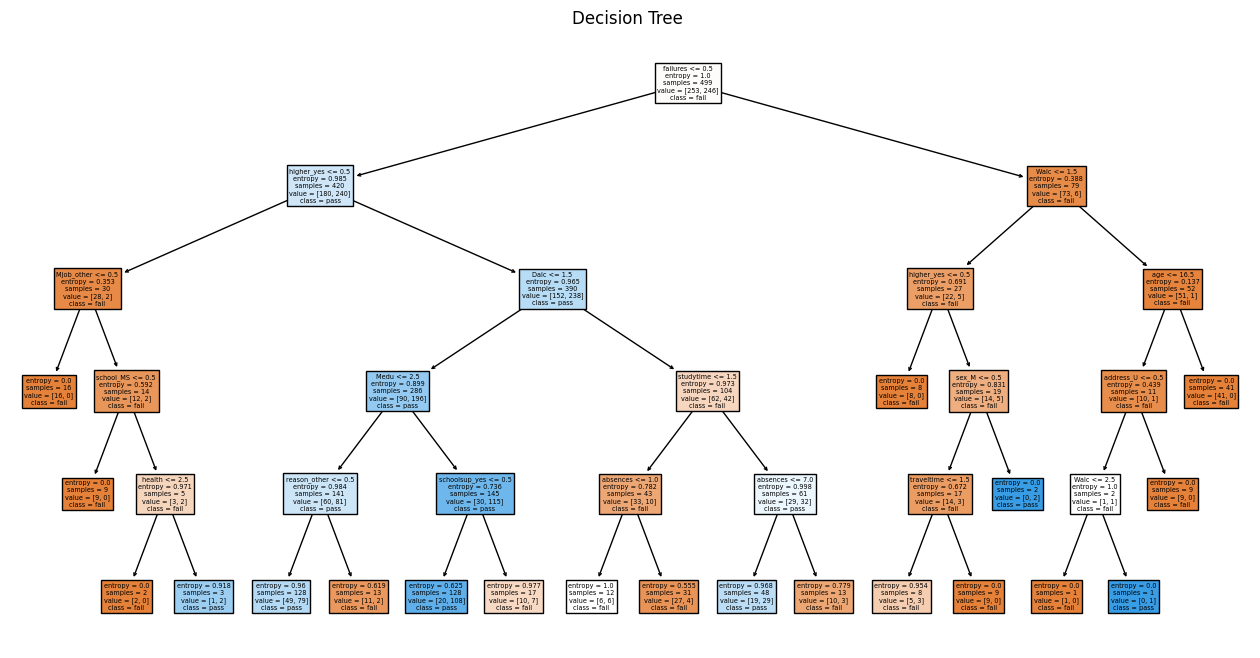

In [ ]:
# plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(classifier, feature_names=X_train.columns, class_names=["fail", "pass"], filled=True)
plt.title("Decision Tree ")
plt.show()


## 5.e) According to your tree, what are the top two level splitting features?



* higher - wants to take higher education
* Walc - weekend alcohol consumption

We can assume that students who want to pursue higher education are more likely to pass, on the contrary, those who consume alcohol tend to fail.



## 5.f) Would Gini be appropriate here as well? Why?

In [ ]:
# try the  criterion 'gini' and max_depth of 5
classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)
classifier_gini.fit(X_train, y_train)

# calculate the accuracy
accuracy_gini = classifier_gini.score(X_test, y_test)

print(f"Accuracy on the test set (Gini): {accuracy_gini:.2f}")


Accuracy on the test set (Gini): 0.64


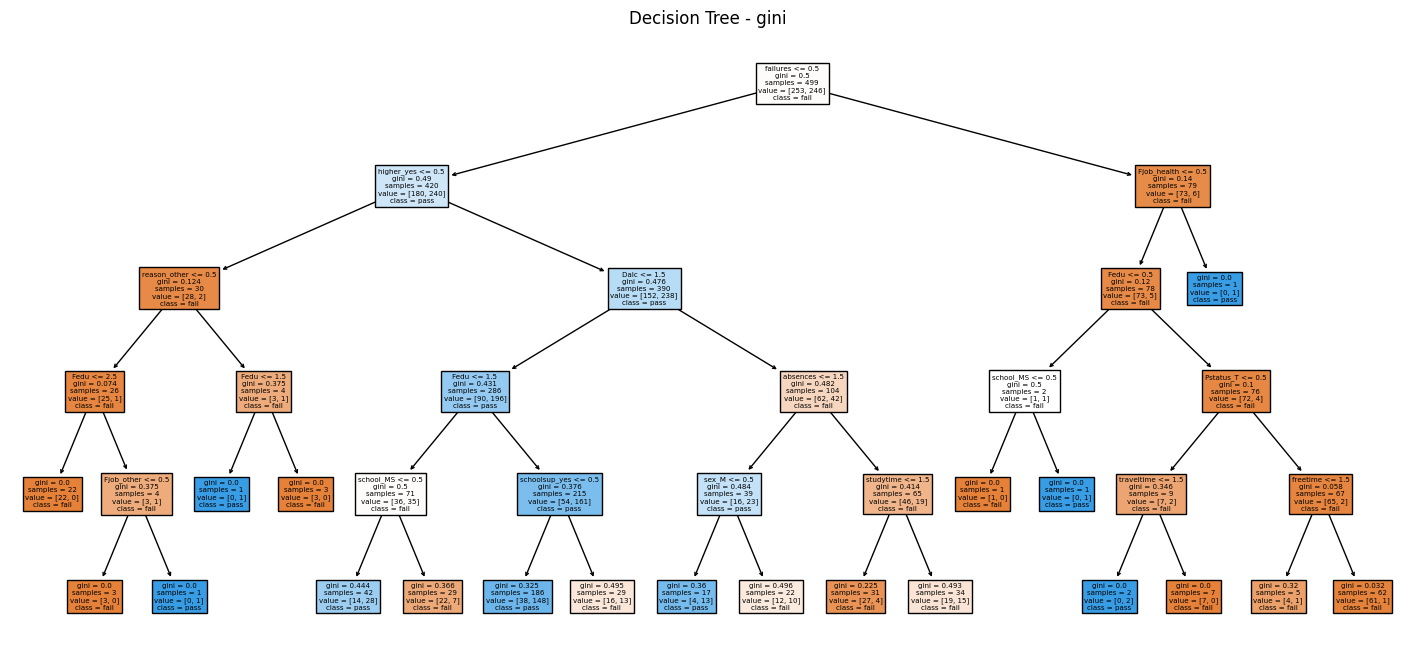

In [ ]:
# plot the decision tree
plt.figure(figsize=(18, 8))
plot_tree(classifier_gini, feature_names=X_train.columns, class_names=["fail", "pass"], filled=True)
plt.title("Decision Tree - gini")
plt.show()


In this case Gini had a low accuracy compared to entropy.

## 6.a) Evaluate the model's performance using 5-fold cross-validation. Is accuracy anappropriate metric, why?


Accuracy is a valid metric for classification models, it is a good metric.

Also, the value increased if we compare single training and cross validation, apparently maintaining or increasing the value, the model is well adjusted to other datasets.
Accuracy alone may not be the most suitable for get the metrics, since the dataset is not always balanced.

Accuracy can often be high, but this is in a data set that is unbalanced, so it will not be a good performance metric.

In [ ]:
#  5-fold cross-validation
crossv_scores_accuracy = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
crossv_scores_precision = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
crossv_scores_recall = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
crossv_scores_f1 = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')

# Print the cross-validation results for each metric
print("-----------------Cross-Validation Results")
print(f"Accuracy: {crossv_scores_accuracy.mean():.2f}")
print(f"Precision: {crossv_scores_precision.mean():.2f}")
print(f"Recall: {crossv_scores_recall.mean():.2f}")
print(f"F1 Score: {crossv_scores_f1.mean():.2f}")


-----------------Cross-Validation Results
Accuracy: 0.71
Precision: 0.68
Recall: 0.79
F1 Score: 0.73


In [ ]:
#  5-fold cross-validation
crossv_scores_accuracy_gini = cross_val_score(classifier_gini, X_train, y_train, cv=5, scoring='accuracy')
crossv_scores_precision_gini = cross_val_score(classifier_gini, X_train, y_train, cv=5, scoring='precision')
crossv_scores_recall_gini = cross_val_score(classifier_gini, X_train, y_train, cv=5, scoring='recall')
crossv_scores_f1_gini = cross_val_score(classifier_gini, X_train, y_train, cv=5, scoring='f1')

# Print the cross-validation results for each metric
print("-----------------Cross-Validation Results (gini)")
print(f"Accuracy: {crossv_scores_accuracy_gini.mean():.2f}")
print(f"Precision: {crossv_scores_precision_gini.mean():.2f}")
print(f"Recall: {crossv_scores_recall_gini.mean():.2f}")
print(f"F1 Score: {crossv_scores_f1_gini.mean():.2f}")




-----------------Cross-Validation Results (gini)
Accuracy: 0.72
Precision: 0.69
Recall: 0.79
F1 Score: 0.73


## 6.b) Report the mean accuracy and its +/-variance.

In [ ]:
# calculate mean accuracy and variance
mean_accuracy = crossv_scores_accuracy.mean()
variance = np.var(crossv_scores_accuracy)

# Print the results
print(f"Mean Accuracy: {mean_accuracy:.2f}, Variance: {variance:.4f}")


Mean Accuracy: 0.71, Variance: 0.0019


In [ ]:
# calculate mean accuracy and variance
mean_accuracy_gini = crossv_scores_accuracy_gini.mean()
variance_gini = np.var(crossv_scores_accuracy_gini)

# Print the results
print(f"Mean Accuracy (gini): {mean_accuracy_gini:.2f}, Variance: {variance_gini:.4f}")

Mean Accuracy (gini): 0.72, Variance: 0.0021


## 7.a) Test the decision tree classifier with different max depths ranging from 1 to 20.






## 7.b) For each depth, evaluate the model using 5-fold cross-validation.


In [ ]:
# diff max depths, range 1-20
depths = list(range(1, 21))
mean_accuracies = []
variances = []

for i in depths:
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=i)

    #  5-fold cross-validation
    cv_scores_accuracy = cross_val_score(classifier, X_train, y_train, cv=5)

    # calculate mean and  variance
    mean_accuracy = cv_scores_accuracy.mean()
    variance_accuracy = np.var(cv_scores_accuracy)

    # append accuracy and variance to their lists
    mean_accuracies.append(mean_accuracy)
    variances.append(variance_accuracy)

    # Print mean accuracy and variance for the current max depth
    print(f"ENTROPY Max depth: {i}, Mean Accuracy: {mean_accuracy:.2f}, Variance: {variance_accuracy:.4f}")

ENTROPY Max depth: 1, Mean Accuracy: 0.63, Variance: 0.0020
ENTROPY Max depth: 2, Mean Accuracy: 0.65, Variance: 0.0031
ENTROPY Max depth: 3, Mean Accuracy: 0.67, Variance: 0.0048
ENTROPY Max depth: 4, Mean Accuracy: 0.66, Variance: 0.0038
ENTROPY Max depth: 5, Mean Accuracy: 0.70, Variance: 0.0028
ENTROPY Max depth: 6, Mean Accuracy: 0.67, Variance: 0.0001
ENTROPY Max depth: 7, Mean Accuracy: 0.65, Variance: 0.0002
ENTROPY Max depth: 8, Mean Accuracy: 0.65, Variance: 0.0008
ENTROPY Max depth: 9, Mean Accuracy: 0.67, Variance: 0.0012
ENTROPY Max depth: 10, Mean Accuracy: 0.67, Variance: 0.0017
ENTROPY Max depth: 11, Mean Accuracy: 0.68, Variance: 0.0005
ENTROPY Max depth: 12, Mean Accuracy: 0.64, Variance: 0.0013
ENTROPY Max depth: 13, Mean Accuracy: 0.65, Variance: 0.0020
ENTROPY Max depth: 14, Mean Accuracy: 0.64, Variance: 0.0017
ENTROPY Max depth: 15, Mean Accuracy: 0.66, Variance: 0.0009
ENTROPY Max depth: 16, Mean Accuracy: 0.66, Variance: 0.0005
ENTROPY Max depth: 17, Mean Accur

## 7.c) Try gini, do you get better results? Do the top splitting features change fromquestion 5f? Include Gini in your grid search

In [ ]:
# diff max depths, range 1-20
depths = list(range(1, 21))
mean_accuracies_gini = []
variances_gini = []

for i in depths:
    classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=i)

    #  5-fold cross-validation
    cv_scores_accuracy_gini = cross_val_score(classifier_gini, X_train, y_train, cv=5)

    # calculate mean and  variance
    mean_accuracy_gini = cv_scores_accuracy_gini.mean()
    variance_accuracy_gini = np.var(cv_scores_accuracy_gini)

    # append accuracy and variance to their lists
    mean_accuracies_gini.append(mean_accuracy_gini)
    variances_gini.append(variance_accuracy_gini)

    # Print mean accuracy and variance for the current max depth for gini
    print(f"GINI - Max depth: {i}, Mean Accuracy: {mean_accuracy:.2f}, Variance: {variance_accuracy:.4f}")

GINI - Max depth: 1, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 2, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 3, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 4, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 5, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 6, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 7, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 8, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 9, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 10, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 11, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 12, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 13, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 14, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 15, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 16, Mean Accuracy: 0.65, Variance: 0.0012
GINI - Max depth: 17, Mean Accuracy: 0.65, Varian

## 8.a)Write Python code that calculates the entropy of a dataset D. You may assume that the classes are comprised of integers. Include printouts of the test cases

In [ ]:
# Test cases, datasets
dataset1 = [1, 2, 2, 3, 3, 3]
dataset2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dataset3 = [2, 3]

In [ ]:
def entropy(dataset):
    # count the classes in the datasets
    class_counts = Counter(dataset)
    # total samples per dataset
    total_samples = len(dataset)

    # init entropy = 0
    entropy_value = 0

    for x in class_counts.values():
        # calculate the proportion of samples in the class
        proportion_samples = x / total_samples
        # calculate the entropy portion for this class
        entropy_i = -proportion_samples * np.log2(proportion_samples)
        # add to total entropy
        entropy_value += entropy_i
    return entropy_value

def calculate_entropy_of_datasets(datasets):
    total_entropy = 0
    for i in datasets:
        total_entropy += entropy(i)
    return total_entropy


In [ ]:
#calculate entropy for each dataset (test case)
entropy_value1 = entropy(dataset1)
entropy_value2 = entropy(dataset2)
entropy_value3 = entropy(dataset3)

print(f"Entropy of dataset1: {entropy_value1:.4f}")
print(f"Entropy of dataset2: {entropy_value2:.4f}")
print(f"Entropy of dataset3: {entropy_value3:.4f}")

# Calculate entropy of the list of datasets
datasets = [dataset1, dataset2, dataset3]
total_entropy = calculate_entropy_of_datasets(datasets)
print(f"Total entropy of datasets: {total_entropy:.4f}")


Entropy of dataset1: 1.4591
Entropy of dataset2: 0.0000
Entropy of dataset3: 1.0000
Total entropy of datasets: 2.4591


## 8.b) Write Python code that calculates the Gini of a non-empty dataset D. You may assume that the classes are comprised of integers. Include the definitions of both Entropy and Gini. Comment your code. Include printouts of the test cases

In [ ]:
def gini(dataset):
    # count the classes in the datasets
    class_counts = Counter(dataset)
    # total samples per dataset
    total_samples = len(dataset)

    # init Gini impurity to 1 because 1 means dataset is perfectly impure, equal distribuition of samples across classes
    gini_value = 1

    for j in class_counts.values():
        # calculate the proportion of samples in the class
        proportion_samples = j / total_samples
        # calculate the gini portion for this class
        gini_i = proportion_samples * (1 - proportion_samples)
        # add to total gini
        gini_value -= gini_i
    return gini_value


In [ ]:
#calculate gini for each dataset (test case)
gini_value1 = gini(dataset1)
gini_value2 = gini(dataset2)
gini_value3 = gini(dataset3)

print(f"Gini impurity of dataset1: {gini_value1:.4f}")
print(f"Gini impurity of dataset2: {gini_value2:.4f}")
print(f"Gini impurity of dataset3: {gini_value3:.4f}")


Gini impurity of dataset1: 0.3889
Gini impurity of dataset2: 1.0000
Gini impurity of dataset3: 0.5000
